<a href="https://colab.research.google.com/github/Lost-illusions/PythonDL/blob/master/pythonDL_dogVsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.安装与kaggle有关的api，并下载dogs-vs-cats数据集**

In [0]:
!pip install -U -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!echo '{"username":"nathaniel2019","key":""}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 27.1MB/s]
 97% 264M/271M [00:02<00:00, 138MB/s]
100% 271M/271M [00:02<00:00, 131MB/s]
100% 541M/543M [00:05<00:00, 156MB/s]
100% 543M/543M [00:05<00:00, 111MB/s]


**2.解压文件**

In [0]:
!unzip test1.zip
!unzip train.zip

In [0]:
# !rm -rf cats_and_dogs_small/

**3.创建较小的数据集，用以训练**





1.   训练集-2000
2.   验证集-1000
1.   测试集-1000





In [0]:
import os, shutil

original_dataset_dir = 'train'
base_dir = 'cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

**4.构建网络**

In [0]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150 , 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


**5.模型编译**

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

**6.数据生成器的构建**

In [0]:
from keras.preprocessing.image import  ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
  print(data_batch.shape, labels_batch.shape)
  break

(20, 150, 150, 3) (20,)


**7.模型拟合**

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 17s 166ms/step - loss: 0.6896 - acc: 0.5290 - val_loss: 0.6895 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 11s 115ms/step - loss: 0.6547 - acc: 0.6055 - val_loss: 0.6401 - val_acc: 0.6420
Epoch 3/30
100/100 [==============================] - 11s 114ms/step - loss: 0.6053 - acc: 0.6680 - val_loss: 0.6946 - val_acc: 0.6000
Epoch 4/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5708 - acc: 0.7055 - val_loss: 0.6139 - val_acc: 0.6610
Epoch 5/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5287 - acc: 0.7345 - val_loss: 0.5916 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5044 - acc: 0.7485 - val_loss: 0.5901 - val_acc: 0.6840
Epoch 7/30
100/100 [==============================] - 11s 112ms/step - loss: 0.4739 - acc: 0.7730 - val_loss: 0.5689 - val_acc: 0.7000
Epoch 8

**8.绘制训练损失和精度、验证损失和精度曲线**}

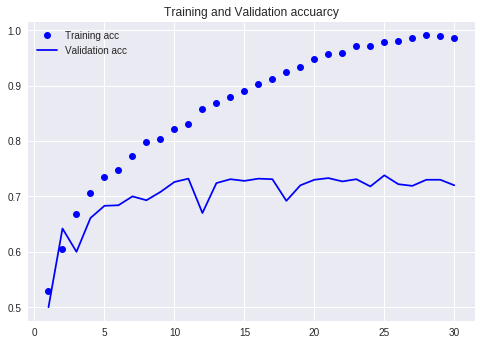

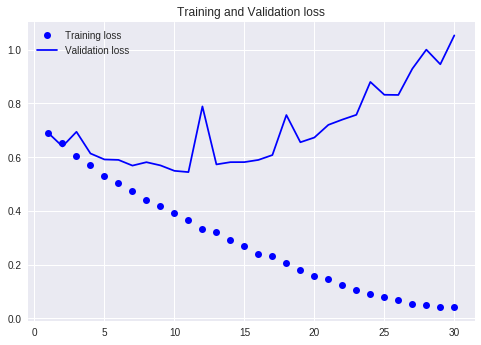

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuarcy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

**9.数据增强**

In [0]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

**10.绘制几幅经过数据增强后的图片**

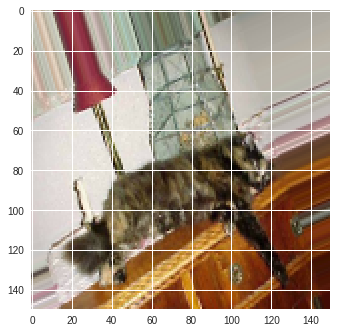

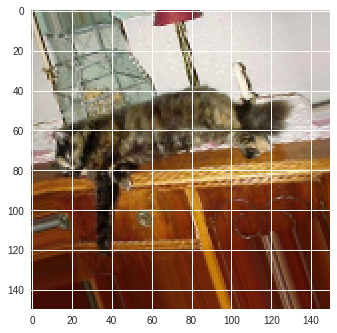

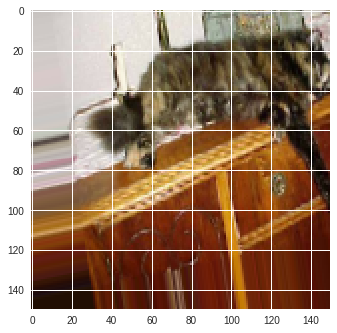

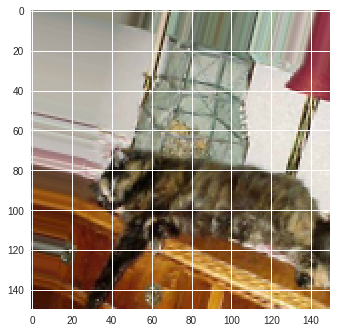

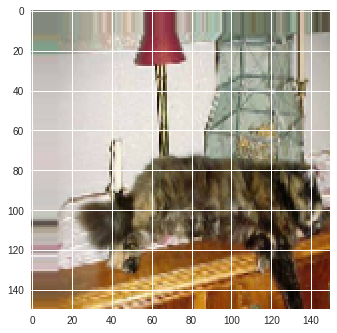

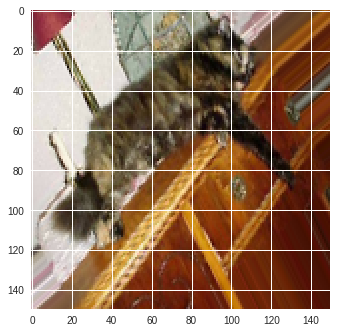

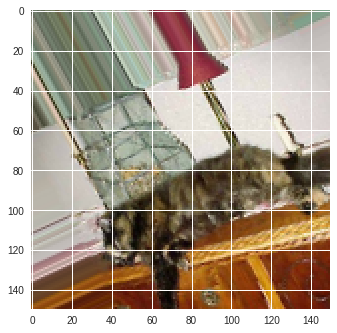

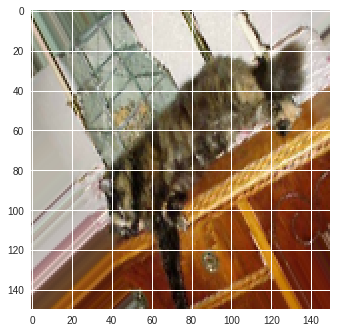

In [0]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 8 == 0:
        break
plt.show()

**11.重新定义一个含有dropout的模型**

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150 , 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**利用数据增强器训练**

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 36s 362ms/step - loss: 0.6920 - acc: 0.5212 - val_loss: 0.6763 - val_acc: 0.5615
Epoch 2/100
100/100 [==============================] - 32s 322ms/step - loss: 0.6806 - acc: 0.5606 - val_loss: 0.6739 - val_acc: 0.5432
Epoch 3/100
100/100 [==============================] - 32s 322ms/step - loss: 0.6710 - acc: 0.5753 - val_loss: 0.6575 - val_acc: 0.5907
Epoch 4/100
100/100 [==============================] - 32s 321ms/step - loss: 0.6459 - acc: 0.6078 - val_loss: 0.6242 - val_acc: 0.6501
Epoch 5/100
100/100 [==============================] - 32s 322ms/step - loss: 0.6405 - acc: 0.6250 - val_loss: 0.6033 - val_acc: 0.6745
Epoch 6/100
100/100 [==============================] - 32s 322ms/step - loss: 0.6229 - acc: 0.6359 - val_loss: 0.5890 - val_acc: 0.6933
Epoch 7/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6078 - acc: 0.6700 -

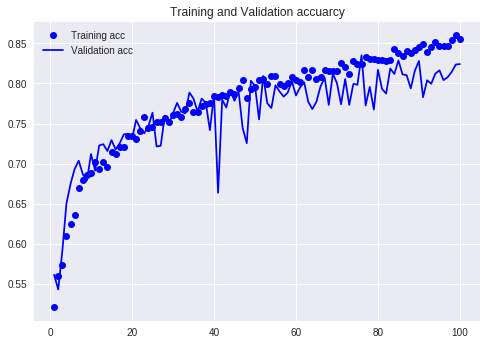

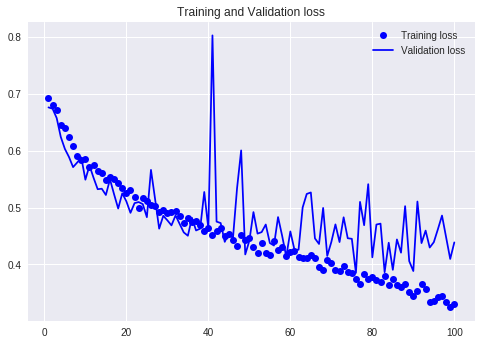

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuarcy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()